In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/AAPL_data.csv')
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,123.47061920166016,129.22606012096526,122.58212678977998,128.61399342864948,112117500
3,2023-01-04,124.74410247802734,127.01469297345623,123.48047238840168,125.26732360590397,89113600
4,2023-01-05,123.42124938964844,126.13608257581905,123.16457967496471,125.50426745503849,80962700


In [5]:
df.rename(columns={'Price': 'Date'}, inplace=True)
# df = df.iloc[2:]
df = df[~df['Date'].isin(['Ticker', 'Date'])]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

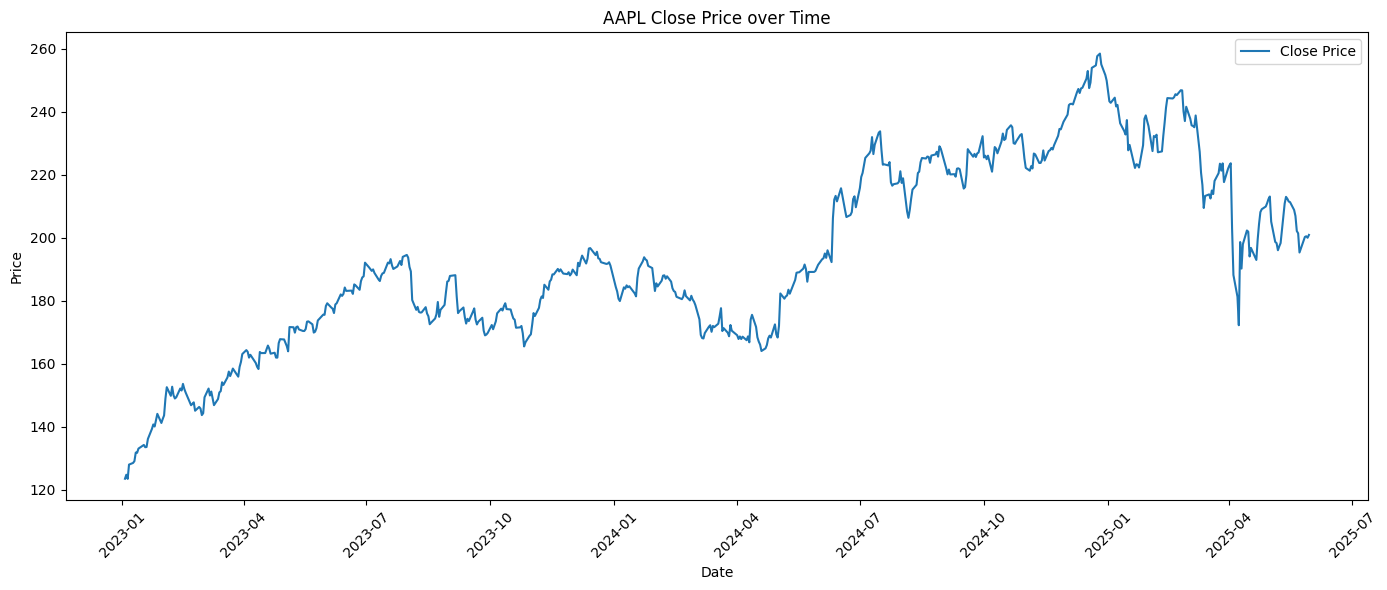

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('AAPL Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

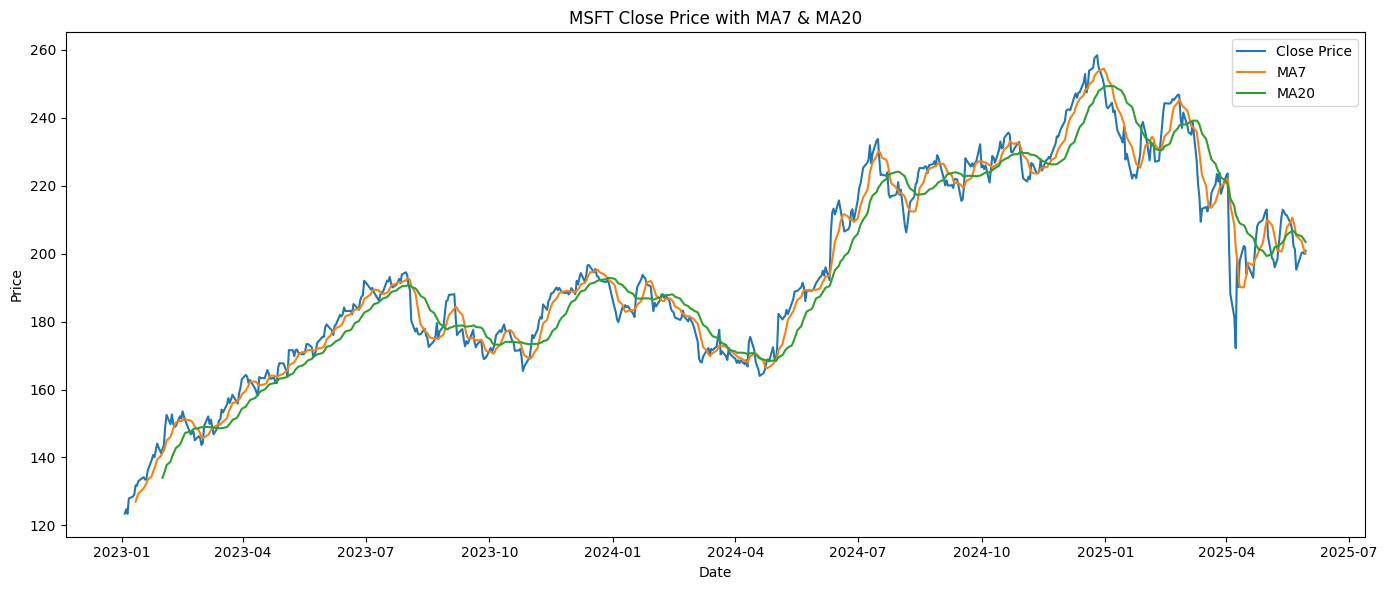

In [7]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA7'], label='MA7')
plt.plot(df['MA20'], label='MA20')
plt.title('MSFT Close Price with MA7 & MA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

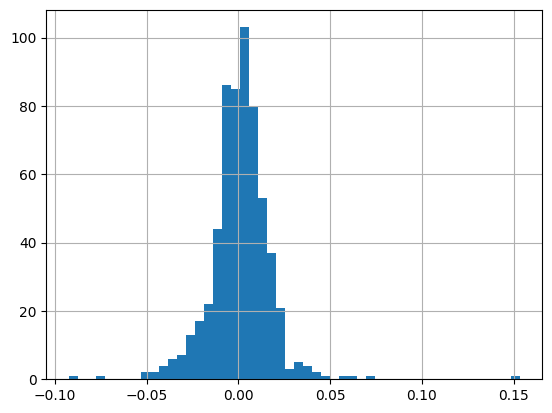

In [8]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['daily_return'] = df['Close'].pct_change()
df['daily_return'].hist(bins=50)

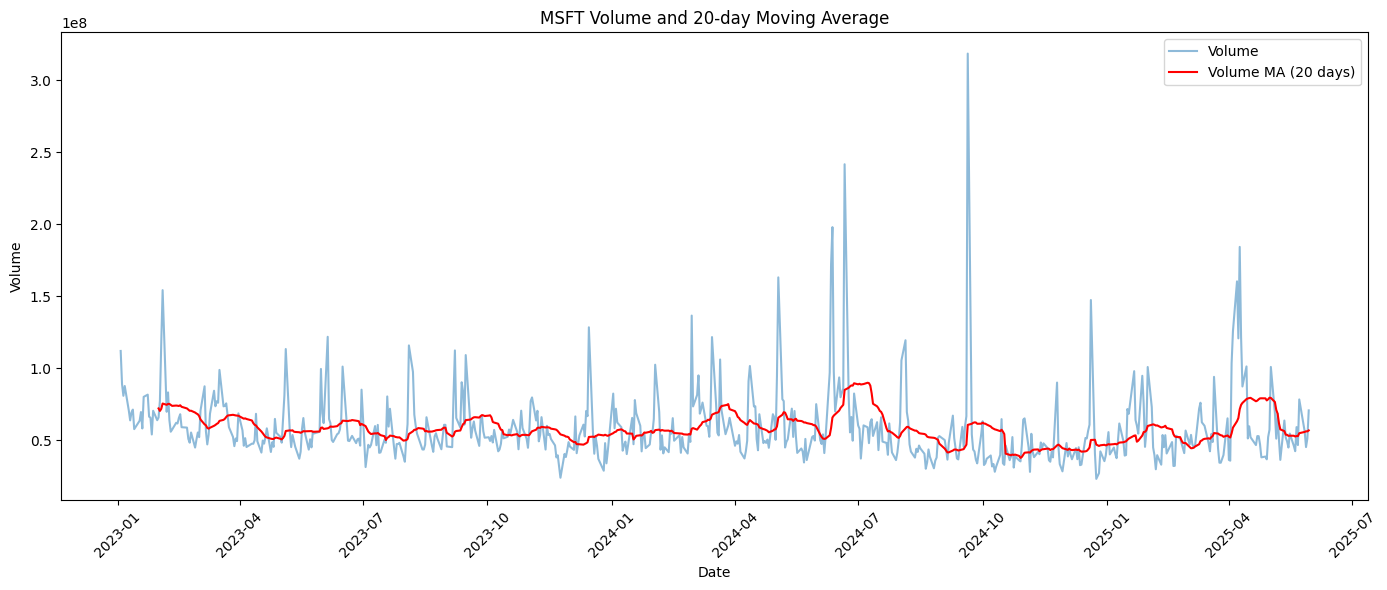

In [9]:
# Tính MA của Volume (Volume_MA)
df['Volume_MA'] = df['Volume'].rolling(window=20).mean()

# Vẽ Volume và Volume_MA
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Volume'], label='Volume', alpha=0.5)
plt.plot(df.index, df['Volume_MA'], label='Volume MA (20 days)', color='red')
plt.title('MSFT Volume and 20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain, index=series.index).rolling(window=window).mean()
    avg_loss = pd.Series(loss, index=series.index).rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI14'] = compute_rsi(df['Close'], window=14)

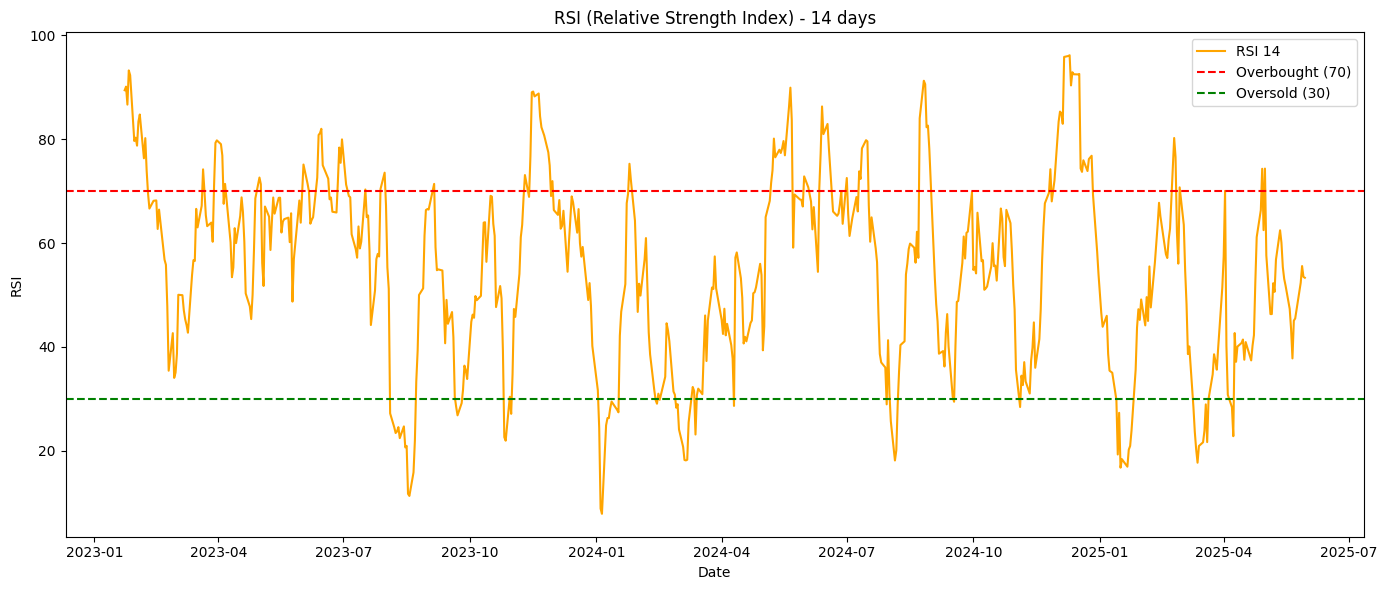

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['RSI14'], label='RSI 14', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index) - 14 days')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

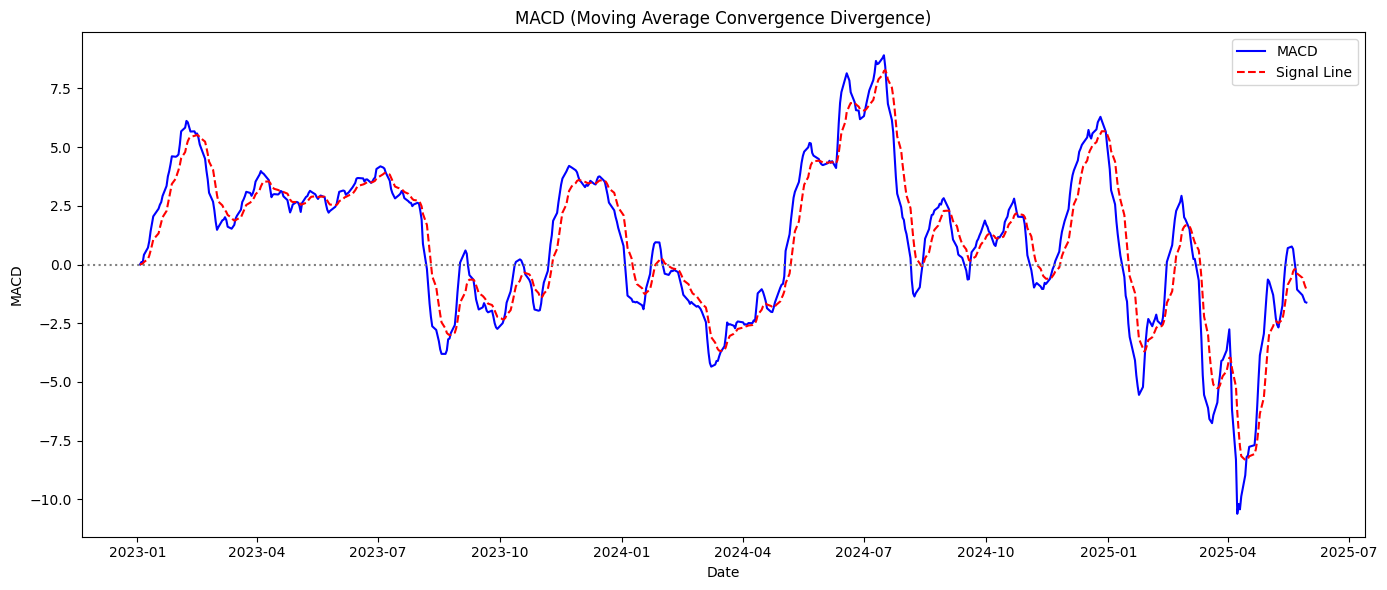

In [13]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_signal'], label='Signal Line', color='red', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
window = 20
df['BB_MA20'] = df['Close'].rolling(window=window).mean()
df['BB_std'] = df['Close'].rolling(window=window).std()
df['BB_upper'] = df['BB_MA20'] + 2 * df['BB_std']
df['BB_lower'] = df['BB_MA20'] - 2 * df['BB_std']

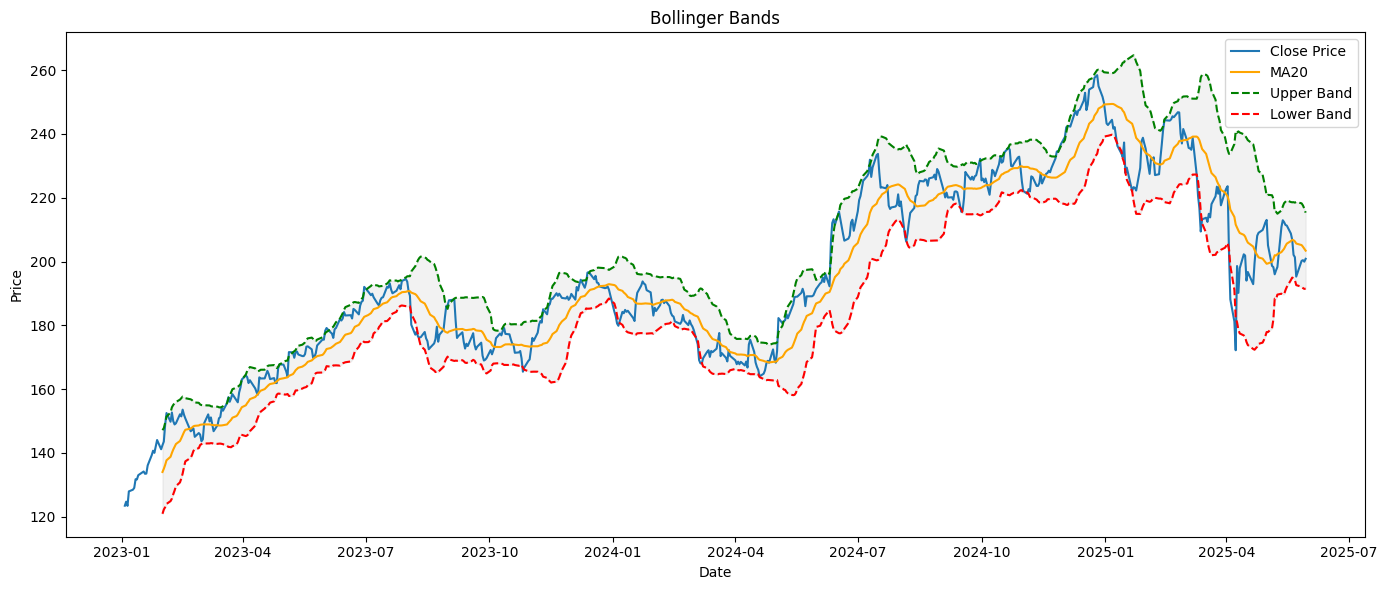

In [15]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['BB_MA20'], label='MA20', color='orange')
plt.plot(df.index, df['BB_upper'], label='Upper Band', color='green', linestyle='--')
plt.plot(df.index, df['BB_lower'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(df.index, df['BB_upper'], df['BB_lower'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
df = df.dropna()

In [17]:
feature_cols = ['Close','High','Low','Open','Volume',
                'MA7','MA20','daily_return','Volume_MA',
                'RSI14','MACD','MACD_signal',
                'BB_MA20','BB_std','BB_upper','BB_lower']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[feature_cols])
df_scaled = pd.DataFrame(scaled, columns=feature_cols, index=df.index)

df_scaled.head()

,Close,High,Low,Open,Volume,MA7,MA20,daily_return,Volume_MA,RSI14,MACD,MACD_signal,BB_MA20,BB_std,BB_upper,BB_lower
Date,,,,,,,,,,,,,,,,
2023-01-31,0.000000,0.000000,0.008066,0.000000,0.144324,0.000000,0.000000,0.412937,0.658429,0.820288,0.780441,0.733553,0.000000,0.324470,0.000000,0.000000
2023-02-01,0.009706,0.019157,0.000000,0.010744,0.184227,0.005391,0.008713,0.408378,0.625439,0.802873,0.783731,0.743588,0.008713,0.312552,0.005700,0.011281
2023-02-02,0.055597,0.057724,0.057554,0.052451,0.321902,0.015737,0.019181,0.527047,0.653422,0.855351,0.805307,0.756692,0.019181,0.328773,0.019860,0.017603
2023-02-03,0.086928,0.110047,0.054697,0.045091,0.443814,0.031512,0.031797,0.475518,0.723699,0.870783,0.834067,0.773939,0.031797,0.344811,0.036085,0.026054
2023-02-06,0.063344,0.073927,0.079483,0.083499,0.157808,0.041209,0.041259,0.303271,0.706563,0.775333,0.842120,0.789631,0.041259,0.352165,0.047135,0.033499


In [19]:
def create_sequences(data, seq_len=60, pred_len=5, target_idx=0):
    """
    Arguments:
      data      -- numpy array hình dạng (n_samples, n_features)
      seq_len   -- số bước quá khứ cho X
      pred_len  -- số bước tương lai để dự đoán y
      target_idx-- chỉ số cột target trong data (mặc định 0 là Close)
    Returns:
      X -- numpy array shape (n_sequences, seq_len, n_features)
      y -- numpy array shape (n_sequences, pred_len)
    """
    X, y = [], []
    total_len = len(data)
    for i in range(total_len - seq_len - pred_len + 1):
        X.append(data[i : i + seq_len])
        y.append(data[i + seq_len : i + seq_len + pred_len, target_idx])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled.values, seq_len=60, pred_len=5, target_idx=0)